In [13]:
def test_with_sklearn(X_train, y_train, X_test, y_test, alpha, lambda_, num_iter):
  
    # Convertir etiquetas one-hot a etiquetas simples, si es necesario
    if len(y_train.shape) > 1:  # y_train está en formato one-hot
        y_train_labels = np.argmax(y_train, axis=1)
    else:  # y_train ya está en formato de etiquetas simples
        y_train_labels = y_train
    
    if len(y_test.shape) > 1:  # y_test está en formato one-hot
        y_test_labels = np.argmax(y_test, axis=1)
    else:  # y_test ya está en formato de etiquetas simples
        y_test_labels = y_test
    
    # Crear y configurar MLPClassifier
    clf = MLPClassifier(
        hidden_layer_sizes=(25,),    # Número de neuronas en la capa oculta (igual que tu implementación)
        activation='logistic',       # Función sigmoidal
        solver='adam',               # Optimizador (ADAM por defecto en sklearn)
        alpha=lambda_,               # Parámetro de regularización L2
        learning_rate_init=alpha,    # Tasa de aprendizaje
        max_iter=num_iter,           # Número máximo de iteraciones
        epsilon = 0.12               # Epsilon    
    )
    
    # Entrenar el modelo
    clf.fit(X_train, y_train_labels)
    
    # Calcular precisión
    accuracy = clf.score(X_test, y_test_labels)  # Evaluar en el conjunto de prueba
    print(f"Precisión con MLPClassifier de sklearn: {accuracy:.5f}")
    return accuracy


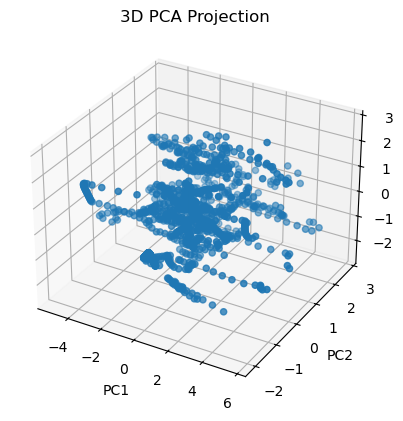


KNN Metrics:
Confusion Matrix:
[[ 0  1  0  0]
 [ 0 90 26  0]
 [ 0 23 99  0]
 [ 0  6  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.78      0.76       116
           3       0.79      0.81      0.80       122
           4       0.00      0.00      0.00         6

    accuracy                           0.77       245
   macro avg       0.39      0.40      0.39       245
weighted avg       0.75      0.77      0.76       245

Accuracy: 0.7714

MLPClassifier with Limited-memory Broyden–Fletcher–Goldfarb–Shanno solver and tangent function Metrics:
Confusion Matrix:
[[ 0  1  0  0]
 [ 0 82 34  0]
 [ 0 28 94  0]
 [ 0  6  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.71      0.70       116
           3       0.73      0.77      0.75       122
        

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier,export_text
from MLP import MLP,MLP_backprop_predict
from utils import one_hot_encoding

def KNN_function():
    # Define parameter grid for KNN
    param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}

    # Create KNN classifier
    knn = KNeighborsClassifier()

    # Perform grid search to find optimal parameters
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on test set
    y_pred = best_model.predict(X_test)

    show_metrics("KNN",y_test,y_pred)

def show_metrics(model_name, y_test, y_pred):
    print(f"\n{model_name} Metrics:")
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    
    # Métricas adicionales: accuracy, precision, recall, f1-score
    print(f"Classification Report:\n{classification_report(y_test, y_pred,zero_division=0)}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("="*50)
# Read data
data_total = pd.read_csv("KartTotal.csv")
# Eliminamos la columna karty, ya que es un dato que carece de valor.
data_total = data_total.drop("karty", axis=1)

# Label mapping for action column
label_mapping = {
    "NONE": 0,
    "ACCELERATE": 1,
    "BRAKE": 2,
    "LEFT_ACCELERATE": 3,
    "RIGHT_ACCELERATE": 4,
    "LEFT_BRAKE": 5,
    "RIGHT_BRAKE": 6
}
data_total['action'] = data_total['action'].map(label_mapping)

# Handle missing values (consider imputation instead of dropping)
# data_total = data_total.dropna(subset=["ray1", "ray2", "ray3", "ray4", "ray5", "kartx", "karty", "kartz", "time", "action"])

# Standardize data (exclude action)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_total.drop('action', axis=1))

# Apply PCA with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)

# Create DataFrame with principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'])  # Access components by column name

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')
plt.show()


# Split data into features (X) and target variable (y)
X = principalDf
y = data_total['action']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KNN_function()

hidden_layer_size = 1
alpha = 1
learning_rate_init = 0.5
num_iter = 2000
#Crear el modelo con los mismos parámetros que tu implementación
mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),  # Ajustar el tamaño de la capa oculta
                   activation='logistic',
                   alpha=alpha,
                   learning_rate_init=learning_rate_init,
                   solver='adam',  # Utilizar el descenso de gradiente estocástico
                   max_iter=num_iter,
                   epsilon=0.12)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Realizar predicciones
y_pred = mlp.predict(X_test)

show_metrics("MLPClassifier with Limited-memory Broyden–Fletcher–Goldfarb–Shanno solver and tangent function",y_test,y_pred)




#Crear el modelo con los mismos parámetros que tu implementación
mlp2 = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),  # Ajustar el tamaño de la capa oculta
                   activation='tanh',
                   alpha=alpha,
                   learning_rate_init=learning_rate_init,
                   solver='lbfgs',  # Utilizar el descenso de gradiente estocástico
                   max_iter=num_iter,
                   epsilon=0.12)

# Entrenar el modelo
mlp2.fit(X_train, y_train)

# Realizar predicciones
y_pred2 = mlp2.predict(X_test)

show_metrics("MLPClassifier with Limited-memory Broyden–Fletcher–Goldfarb–Shanno solver and tangent function",y_test,y_pred2)

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_randomForest = model.predict(X_test)
show_metrics("RandomTreeClassifier",y_test,y_pred_randomForest)


decisionTree = DecisionTreeClassifier(random_state=0,max_depth=2)
decisionTree = decisionTree.fit(X_train,y_train)
y_pred_decisionTree = decisionTree.predict(X_test)
show_metrics("DecisionTreeClassifier",y_test,y_pred_decisionTree)


num_elementos = [data_total[col].count() for col in data_total.columns]
y_one = one_hot_encoding(y.to_numpy()) 
X_train, X_test, y_train_one_hot,y_test_one_hot = train_test_split(X, y_one, test_size=0.33, random_state=0)


y_test =np.argmax(y_test_one_hot,axis=1)

y_pred_ourMLP=MLP_backprop_predict(X_train,y_train_one_hot,X_test,num_elementos,alpha,1,20,0)
show_metrics("OurMLP",y_test,y_pred_ourMLP)
